# Bug and Rivet Paradox in Special Relativity (number 2)
Use the Local Lorentz Frame classes LLF() and especially LorShape() to graphically check the Bug and Rivet Pardox.<br>
See the collection of functions and classes in LLFTransforms.py.<br>
Check out http://hyperphysics.phy-astr.gsu.edu/hbase/Relativ/bugrivet.html .
20190129 WEG

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import LLFTransforms as LLFT  # For the LorShape() class especially.

## Starting shape of the bug in a hole, a shape moving, but at rest in the S'-frame.

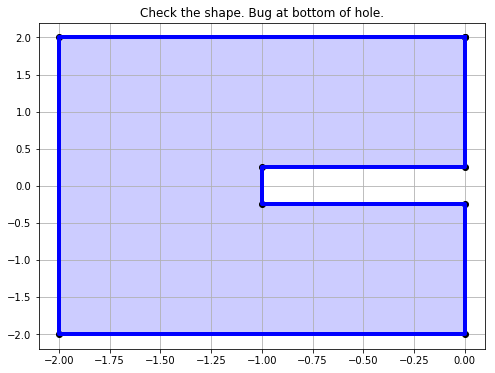

In [2]:
# Draw a closed polygon as a starting shape at t'=0, and will move by m' .
#
# Make it 1 deep and +/- 1/4 for y.  All in the x-y plane and time is t' = 0.0 say.
xdeep = 1.0
ywidth = 0.25
ysize = 2 # +/- the units in extent
xback = 2.0
# Append t later.
myHole = np.array([ [0.0, ysize], [0.0, ywidth], [-xdeep, ywidth], [-xdeep, -ywidth], [0.0, -ywidth], 
                   [.0, -ysize], [-xback, -ysize], [-xback, ysize], [0.0, ysize]  ])

fig, ax = plt.subplots( figsize=(8,6) )

xx = myHole.transpose()[0]
yy = myHole.transpose()[1]

ax.fill( xx, yy, 'b', alpha=0.2)


ax.plot( xx, yy, 'ko', label='dots')
ax.plot( xx, yy, 'b-', label='lines', lw=4)
plt.title('Check the shape. Bug at bottom of hole.')
plt.grid(True)
plt.show()

In [3]:
# Calculate the "4" vectors for the above shape, prepend time...want starting shape and starting vector for the
# motion in the S' frame.
myHole = LLFT.prependTime( myHole, 0.0 )
mySlope = np.array( [ [1., 0., 0. ] for uu in myHole] ) # Make a bunch of copies of [1,0,0].

In [4]:
aLShape = LLFT.LorShape(0.9, 3, myHole, mySlope)  # Have the initial shape in S' and its direction as t' changes.

## Collect some number of shapes in the S-frame at different times.

In [5]:
ntSlices  = 5
tSlices = np.linspace(-1.0, 12.0, ntSlices, endpoint=True)
aa = []
for tt in tSlices:
    aa.append( aLShape.shapeXAtT(tt) )
myHoleInS = np.array(aa)

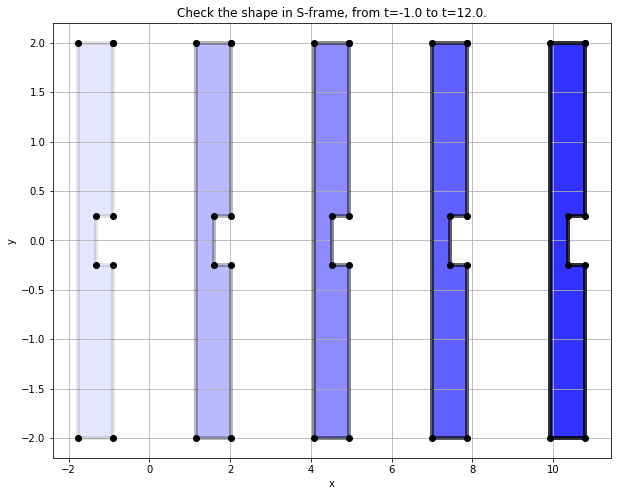

In [6]:
# Plot them...in x-y space.
alphas = np.linspace(0.1, 0.8, len(tSlices) )  # So that earlier in time are fainter.

fig, ax = plt.subplots( figsize = (10,8) )

for alf, aHole in zip(alphas, myHoleInS):
    xx = aHole.transpose()[1]
    yy = aHole.transpose()[2]
    ax.fill( xx, yy, 'b', alpha=alf )
    ax.plot( xx, yy, 'ko', label='dots' )
    ax.plot( xx, yy, 'k-', label='lines', lw=4, alpha=alf )
tstart, tend = ( myHoleInS[0][0][0], myHoleInS[-1][0][0] )
plt.title('Check the shape in S-frame, from t={} to t={}.'.format(tstart, tend) )
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

if 1: plt.savefig('MovingHole2.png')
plt.show()


## See the above url about the Bug and Rivet Paradox. 
As stated there, there is a hole 1cm deep with a bug down there and (a human?) has a rivet that is only 0.8cm long.  So she cannot squish the bug, but she decides to boost the hole at relativistic speeds to contract the hole and the rivet will hit the bug.  BUT the bug sees the rivet length contracted, so smaller than 0.8cm and not able to squish him.  Solve by simultaneity, which should come out of out Lorentz Shapes class.<br>

First we have a hole moving at 0.9c as above, and the rivet is at rest in the S-frame.<br>

Use the LorShapes class, but let beta=0.0, just to find the rivet shapes at different times.

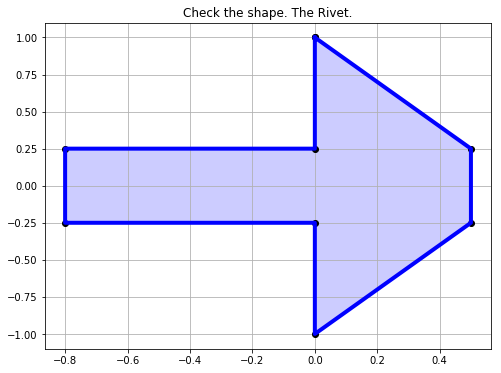

In [7]:
# Rivet

# Draw a closed polygon as a starting shape at t'=0, and will move by m' .
#
# Make a rivet 0.8 deep and +/- 1/4 for y.  All in the x-y plane and time is t' = 0.0 say.
xdeep = 0.8
xhead = 0.5
ywidth = 0.25
ysize = 1 # +/- the units in extent
xback = 2.0
# Append t later.
myRivet = np.array([ [0.0, ysize], [xhead, ywidth], [xhead, -ywidth], [0.0, -ysize], [0.0, -ywidth],
                   [-xdeep, -ywidth], [-xdeep, ywidth], [0.0, ywidth], [0.0, ysize] ] )

fig, ax = plt.subplots( figsize=(8,6) )

xx = myRivet.transpose()[0]
yy = myRivet.transpose()[1]

ax.fill( xx, yy, 'b', alpha=0.2)


ax.plot( xx, yy, 'ko', label='dots')
ax.plot( xx, yy, 'b-', label='lines', lw=4)
plt.title('Check the shape. The Rivet.')
plt.grid(True)
plt.show()

In [8]:
# Prepend the time.
myRivet = LLFT.prependTime(myRivet, 0.0)
# use the translateShape to move it over to x = +1.0
myRivet = LLFT.translateShape(myRivet, np.array( [0.0, +1.8, 0.0] ) )

In [9]:
myRivet

array([[ 0.  ,  1.8 ,  1.  ],
       [ 0.  ,  2.3 ,  0.25],
       [ 0.  ,  2.3 , -0.25],
       [ 0.  ,  1.8 , -1.  ],
       [ 0.  ,  1.8 , -0.25],
       [ 0.  ,  1.  , -0.25],
       [ 0.  ,  1.  ,  0.25],
       [ 0.  ,  1.8 ,  0.25],
       [ 0.  ,  1.8 ,  1.  ]])

In [10]:
# Let its LorShape have beta = 0.0, might be trouble:)
mySlope = np.array( [ [1., 0., 0. ] for uu in myRivet] )
bLShape = LLFT.LorShape(0.0, 3, myRivet, mySlope)  # So the S' and S frame are the same.

In [11]:
# Evolve the rivet in time.
